In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [7]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [8]:
pyber_data_df["date"] = pd.to_datetime(pyber_data_df["date"])

In [9]:
#Total number of rides
count_rides_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
count_rides_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [10]:
#Total number of drivers
sum_drivers_type = city_data_df.groupby(["type"]).sum()["driver_count"]
sum_drivers_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [11]:
#Total number of fares 
sum_fares_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [12]:
avg_fare_per_ride = sum_fares_type/count_rides_type
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [13]:
avg_fare_per_driver=sum_fares_type/sum_drivers_type
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [14]:
#Combine each series into a DataFrame
summaryDF= pd.DataFrame({
    "Total Rides" : count_rides_type.map("{:,}".format),
    "Total Drivers" : sum_drivers_type.map("{:,}".format),
    "Total Fares" : sum_fares_type.map("${:.2f}".format),
    "Average Fare Per Ride" : avg_fare_per_ride.map("${:.2f}".format),
    "Average Fare Per Driver" : avg_fare_per_driver.map("${:.2f}".format)
})
summaryDF.index.name = None
summaryDF

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,"1,625","2,405",$39854.38,$24.53,$16.57


In [15]:
#Rename columns
pyber_data_df = pyber_data_df.rename(columns = {'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
#Set the index to the Date column.
pyber_data_df.set_index("Date", inplace = True)
pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [17]:
#create new DataFrame --include City Type and Fare columns using the copy() method
faresByCityTypeDF = pyber_data_df[["City Type", "Fare"]].copy()
faresByCityTypeDF.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [18]:
faresByCityTypeDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [19]:
#Calculate the sum() of fares by the type of city and date using groupby() to create a Series
faresbyCityTypeDateDF = pd.DataFrame(faresByCityTypeDF.groupby(["Date","City Type"]).sum())
faresbyCityTypeDateDF

,,Fare
Date,City Type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [20]:
#Reset the index, then create a pivot table DataFrame with the Date as the index and columns = 'City Type'. The Fare for each Date should appear in each row.
updateIndexFaresDF= faresbyCityTypeDateDF.reset_index()
pyberPivotTableDF = updateIndexFaresDF.pivot(index="Date", columns = "City Type")["Fare"]
pyberPivotTableDF.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [21]:
#Create a new DataFrame from the pivot table DataFrame on the given dates, '2019-01-01':'2019-04-28', using loc.
updatePyberFaresDF = pyberPivotTableDF.loc['2019-01-01':'2019-04-28']
updatePyberFaresDF.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [22]:
updatePyberFaresDF = updatePyberFaresDF.resample("W").sum()
updatePyberFaresDF

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


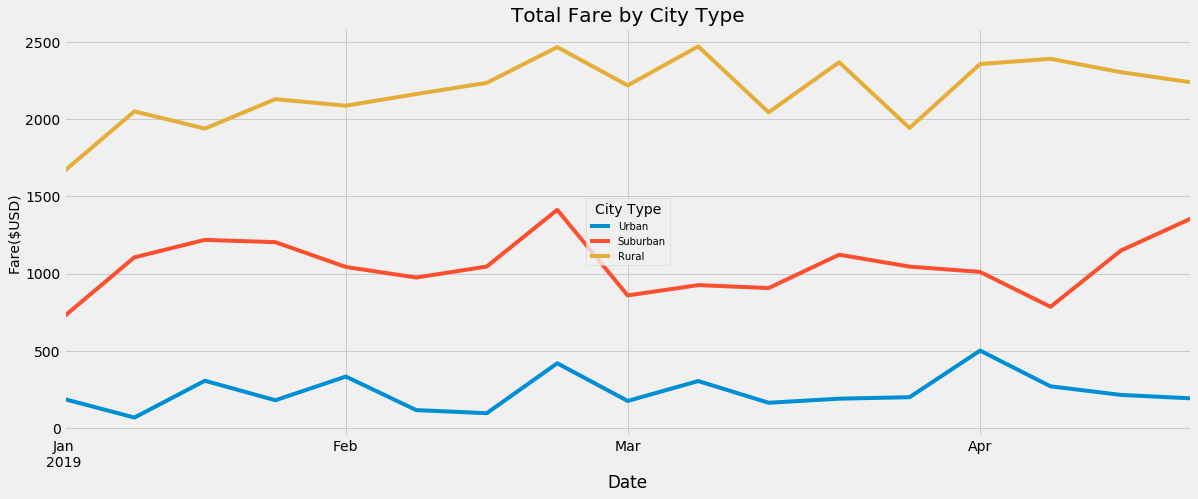

In [23]:
#the DataFrame you created in Step 9 using the df.plot()

#Setting FiveThirtyEight style
plt.style.use('fivethirtyeight')

#Plotting each category
ax = updatePyberFaresDF.plot(figsize=(18,7))

#Set axis 
ax.set_title("Total Fare by City Type", fontsize = "20")
ax.set_ylabel("Fare($USD)", fontsize = "14")
ax.grid(True)


ax.legend(["Urban", "Suburban", "Rural"], title="City Type", loc="center", fontsize="10", mode="Expanded")

plt.savefig("analysis/Fig8.png")
plt.show()